# COLLABORATIVE FILTERING  TUTORIAL



Hi,this is my Jupyter Notebook tutorial on *Collaborative Filtering* .Recommender Systems are a class of web applications that involve prediciting  users response to many options provided before them.These are exciting and used ubiquitously by organizations such as Amazon,Netflix etc.These organizations place a lot of emphasis on developing accurate recommender systems since predicting users preferences is of paramount importance to them .Netflix(2006-2009) announced the USD * 1 Million Prize * for the group which could improve its Baseline Prediction for its Users preferences on Movies by the largest margin.It was awarded to a Team which developed a Collaborative Filtering model **which bettered the pre-exisiting performance by over 10%.**<br/>
Hence,we see for Organizations even a small increase in prediction accuracy translates to  large financial implications and overall growth of the Service.In todays world,recommendation engines are a crucial part of the Data Science setting.<br/>
Our tutorial aims to elucidate upon the fundamentals of Recommender Systems using 2 Datasets-One is a relatively small Dataset created by me to *explain certain concepts more clearly*. After this,the same analysis is carried out using a Data Set ** downloaded from the MovieLens website ** along with Data Visualization.


<img src='NetflixPrize.jpg'>
Reference:Mashable.com

## SECTIONS

* <a href='#Types'>Types of Recommender Systems</a>
* <a href='#Sample DataSet'>Sample Dataset</a>
  * <a href='#EC'>Extracting CSV Data and Cleaning</a>
  * <a href='#ED'>Euclidean Distance</a>
  * <a href='#PC'>Pearson Correlation</a>
  * <a href='#APC'>Advantages of Pearson Correlation</a>
  * <a href='#FCN'>Finding the 'Closest Neigbour' to a User</a>
  * <a href='#RBI'>Recommending Best Item to a User</a>

  
* <a href='#MLDS'>Movie Lens Data Set</a>
  * <a href='#FAWD'>Merging User Data and Visualization</a>
  * <a href='#GTRM'>Get Top Rated Movies for Users</a>
   
  

* <a href='#EVRS'>Evaluate Recommendation System and Challenges</a>
* <a href='#RHL'>References and Helpful Links</a>



<a id='Types'></a>
# TYPES OF RECOMMENDER SYSTEMS

There are 2 types of Filtering Algorithms:-

**Content Based  Filtering**:New products/services are recommended to  Individuals based on Genre/type previously ordered/reviewed.For example,if you are a Fan of 'Star Wars''Star Trek' etc,the content based Filtering algorithm will recommend movies along the genre of 'Sci-Fi'.(Maybe the New Star Wars/Avatar Sequel will be recommended to you in the Future!)

**Collaborative Filtering System**:Here recommendations are provided based on similiarity between Users/Items previously rated.For example imagine that you and your friends A(same likes) and B(dislikes for similiar products) buy certain products.Based on the previous products ordered by them and you, a new Shampoo brand (picked by both A and/or B) can be recommended to you.Chances are good that you'll like the brand rated highly by  A and detest(or never buy again!!) the one of preference by your friend B.



<a id='Sample DataSet'></a>
# SAMPLE DATASET

As we have seen Collaborative Filtering takes a different approach from Content Based Filtering .Here we have a list of Users,lots of ratings and recommendations provided by  *some Users* on *some movies*.
To simplify matters rather than providing a Large Sparse Matrix(will deal with Sparsity Later) we  take a relatively smaller list of Users and movie ratings stored in a CSV Sheet with ratings from 0 to 5.
We have  Users UA(User A) to UG(User G) who have rated various movies.Not all Users have rated all of the Movies so our goal is to find similarity among certain users who have and to derive recommendations based on previous ratings made by them.

Here we load the Dataframe CF1.csv.To simplify the Understanding the csv file,it takes the Users as Columns and the Rows as the Movies.The Users are represented by "U.." and the Items are given by "I..".The 2 approaches to Filtering are:-

**Item based Filtering**:This takes the Similiarity between the Consumption of Items.Not all of the given users rate a particular Item.

**User User Filtering**:Which provides Product recommendation based on what users who rated similar products gave.<br/>The Figure Given Below depicts the Difference.

<img src='U.jpg'>
Reference:Salem Marafi Blog Post

In [1]:
%matplotlib inline
#IMORTING ALL THE REQUIRED LIBRARIES
import pandas as pd
from scipy.spatial.distance import cosine
import numpy as np
from numpy import linalg as la
from scipy.stats.stats import pearsonr
from IPython.display import Image
from math import isnan
from pandas import compat 
import matplotlib.pyplot as plt


<a id='EC'></a>
## EXTRACTING CSV DATA AND CLEANING

In [2]:
#READING THE CSV FILES
useritemlist1=pd.read_csv('CF1.csv')
print useritemlist1.head()
userdict=useritemlist1.set_index('User').to_dict()
#Converts our DataFrame to a Dictionary of Dicitionaries with Each User as Key,and The Index as Another Dictionary 
#Format{User:{Item:Rating}.....}


  User   UA   UB   UC   UD   UE   UF   UG   UH   UI   UJ   UK   UL
0   IA  NaN  5.0  3.0  5.0  4.0  0.0  4.0  2.0  5.0  4.0  2.0  5.0
1   IB  4.0  4.0  4.0  2.0  3.0  0.0  0.0  0.0  4.0  NaN  1.0  NaN
2   IC  5.0  5.0  5.0  3.0  2.0  0.0  4.0  2.0  3.0  3.0  NaN  1.0
3   ID  4.0  5.0  2.0  4.0  NaN  0.0  4.0  NaN  2.0  NaN  2.0  NaN
4   IE  5.0  2.0  5.0  5.0  1.0  3.0  2.0  1.0  1.0  NaN  3.0  2.0


Here,we notice a lot of NAN Values stored in the Data Frame.In  traditional data frames,the values stored are very sparse.So we get the Dictionary after filtering out all these NAN Values.The Steps in Cleaning:-
* Setting up our Initial Dictionary
* Iterating over all the Columns and taking all Numeric Values(>0.0)
* Storing these numeric valid entries in Dictionary

This returns a List of Movies rated by Each User which are not NAN Values.

In [3]:
ourdict={} #Initialize the Dictionary

for element in useritemlist1:
    if(element!='User'):
        i=0 #Sets up the Counter for Accessing Each Row Element
        ourdict[element]={} #Initialize Dictionary as Empty
        for e1 in useritemlist1[element]: #Iterating over Movie Ratings for Each Movie.
            e1=float(e1)
            if(e1>=0.0):#Checking Condition for non-NAN Values
              x=useritemlist1['User'][i]
              ourdict[element][x]=e1 #Appending the User-Move-Rating to the Dicitonary
             
            i+=1 #Incrementing the Counter at Each Iteration
       
print "Previous Dictionary with NAN Values still there:\n\n",userdict

print "\nDictionary of Users and Ratings with NAN Values filtered out:\n\n",ourdict



Previous Dictionary with NAN Values still there:

{'UL': {'II': nan, 'IH': 3.0, 'IJ': nan, 'IA': 5.0, 'IC': 1.0, 'IB': nan, 'IE': 2.0, 'ID': nan, 'IG': 4.0, 'IF': nan}, 'UI': {'II': 4.0, 'IH': 5.0, 'IJ': nan, 'IA': 5.0, 'IC': 3.0, 'IB': 4.0, 'IE': 1.0, 'ID': 2.0, 'IG': nan, 'IF': 1.0}, 'UH': {'II': 1.0, 'IH': 2.0, 'IJ': nan, 'IA': 2.0, 'IC': 2.0, 'IB': 0.0, 'IE': 1.0, 'ID': nan, 'IG': nan, 'IF': nan}, 'UK': {'II': 1.0, 'IH': nan, 'IJ': nan, 'IA': 2.0, 'IC': nan, 'IB': 1.0, 'IE': 3.0, 'ID': 2.0, 'IG': 1.0, 'IF': 4.0}, 'UJ': {'II': 2.0, 'IH': 4.0, 'IJ': nan, 'IA': 4.0, 'IC': 3.0, 'IB': nan, 'IE': nan, 'ID': nan, 'IG': 2.0, 'IF': nan}, 'UE': {'II': 3.0, 'IH': 2.0, 'IJ': nan, 'IA': 4.0, 'IC': 2.0, 'IB': 3.0, 'IE': 1.0, 'ID': nan, 'IG': 4.0, 'IF': 1.0}, 'UD': {'II': 5.0, 'IH': 4.0, 'IJ': nan, 'IA': 5.0, 'IC': 3.0, 'IB': 2.0, 'IE': 5.0, 'ID': 4.0, 'IG': 3.0, 'IF': 2.0}, 'UG': {'II': 2.0, 'IH': 4.0, 'IJ': 4.0, 'IA': 4.0, 'IC': 4.0, 'IB': 0.0, 'IE': 2.0, 'ID': 4.0, 'IG': nan, 'IF': nan}, 'UF':

<a id='ED'></a>
## EUCLIDEAN DISTANCE
We  now have every users rating stored in a Dictionary for all the movies.To calculate the similiarty  between movies(on the basis of User Ratings),we have 2 distance metrics which we can make use of.<br\>
The first option is the Euclidean Distance which is the sum of Square Distances between 2 points.An example
of Euclidean Distance is given below:-

In [4]:
Values1=[1,1,3,4,5,6,7,8,9,10]
Values2=[10,20,30,40,50,60,70,80,90,100]#Sample Lists of Values
print "List of Ratings by User 1:",Values1
print "List of Ratings by User 2:",Values2

List of Ratings by User 1: [1, 1, 3, 4, 5, 6, 7, 8, 9, 10]
List of Ratings by User 2: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


A long and tedious Way to Do this is:-

In [5]:
EucDistance=0
for i in range(len(Values1)):
    ElementDifference=Values1[i]-Values2[i]#Finding Difference Between Every Element in the Lists
    SquareElementDifference=pow(ElementDifference,2)#Squaring Each Element in the Subtracted List
    EucDistance+=SquareElementDifference#Summing these Distances and Square Root-> Similar to L2 Norm
EucDistance=pow(EucDistance,0.5)
print "The Euclidean Distance among Ratings are",EucDistance
    

The Euclidean Distance among Ratings are 176.697481589


A more efficient method of the Same implementation will be:-

In [6]:
Values1=np.array(Values1)
Values2=np.array(Values2)
EucDistance=la.norm(Values1-Values2)#Directly Computing the L2 Norm
print "The Same Calculation Achieved using an Inbuilt Function",EucDistance

The Same Calculation Achieved using an Inbuilt Function 176.697481589


<a id='PC'></a>
## PEARSON CORRELATION
This is the second method which can be used by us.An example of the Pearson Coorelation inbuilt function  is given:-

In [7]:
def ourpearsonfunction(Values1,Values2):
    Pearson_corr=pearsonr(Values1,Values2)#Inbuilt function for Computing Pearson Corelation
    
    return Pearson_corr[0]
#Example Testing-Run the Following Code to see an Example of Pearson Co-relation
#Returns Result Between -1 to 1 ,1 Indicating Complete Co-relation(-1 Same Magnitute Opposite Sign) 
#0 Indicates No Correlation
PC=ourpearsonfunction(Values1,Values2)
print "The Pearson Correlation is given by:",PC

The Pearson Correlation is given by: 0.995834714849


Here,using Linear Algebra ,we achieved the same results in much fewer lines of Code and more efficiently.Now that the Our function for Pearson Correlation is fixed,we can use it to find the Similarity between 2 Items based on all of the Users Feedbacks.You might have noticed,that we used only the 1st coefficient of the Pearson Function rather than both of the Values.The Second Value indicates the 2 tailed p:-A Value between 0 to 1,giving the probablity of our data arising if the Null Hypothesis was true.

You can play along with the Values of 1 and 2 to see different pearson correlation values.

The  Pearson Correlation Formula is given by:-
$$r = \frac{(n(\sum_{}{}xy))-(\sum_{}{}x)(\sum_{}{}y))}{{\sqrt{(n(\sum_{}{}x^2)-(\sum_{}{}x)^2)(n(\sum_{}{}y^2)-(\sum_{}{}y)^2)}}}$$

Here x is the List containing all Ratings by User 1 and y contains the corresponding ratings by User 2 for the same movies.N is the total number of entries in either list(Equally Sized)



### PEARSON CORRELATION -MOVIE SIMILARITY

In [8]:
"""
Here,our goal is to compute the Similiarty between Movies based on Ratings given to them by Users.We find the Ratings 
Given by Each User who has rated both the Movies and find the Pearson Similiarity among these 2 Lists of individual Ratings
among common movies .
Note:IF YOU WANT TO RUN THIS CELL AGAIN,RE-RUN  EVERYTHING FROM BEGINING TO THIS CELL-the ourdict dictionary gets changed 
later on in the Movielens section
item1-First Movie
item2-Second Movie
"""
def itemcorrelation(item1,item2):

    user_item=[]
    
    for element in userdict:
        if(item1 in userdict[element]):
          if(item2 in userdict[element]):
            user_item.append(element)#Finding Users who have rated both of the Movies
    common_users=set(user_item)
    print "The following Users have rated both of the Movies:",common_users
    print "Number of Common Users who rated Items:",len(common_users)
    len_common_users=len(common_users)
    if(len_common_users==0):#If no User has rated both of the Movies,return 0 indicating cannot be computed
        return 0
    else:
        item_1rating=[]
        item_2rating=[]#Initialize 2 lists storing values for both ratings by each User
        for element in common_users:
            item_1rating.append(userdict[element][item1])
            item_2rating.append(userdict[element][item2])
        print item_1rating
        print item_2rating
        itemitemcorrelation=ourpearsonfunction(item_1rating,item_2rating)#Applying the Pearson Co-relation to Items
    return itemitemcorrelation
    pass
userdict=ourdict                        
print itemcorrelation('IA','IB')

The following Users have rated both of the Movies: set(['UI', 'UH', 'UK', 'UE', 'UD', 'UG', 'UF', 'UC', 'UB'])
Number of Common Users who rated Items: 9
[5.0, 2.0, 2.0, 4.0, 5.0, 4.0, 0.0, 3.0, 5.0]
[4.0, 0.0, 1.0, 3.0, 2.0, 0.0, 0.0, 4.0, 4.0]
0.64051261522


<a id='APC'></a>
## ADVANTAGES OF PEARSON CORRELATION

### EUCLIDEAN DISTANCE-USER,USER

In [9]:
"""
Computing the Same Movie Similarity using the Euclidean Distance metric.We will be comparing the results of our Pearson
and Euclidean Distance for Similar Data Entries and make comments on thier efficacy based on the results.
p1=User 1
p2=User 2
"""
def similiarity_users(p1,p2):
    Movie_bothseen=0
    for movie in ourdict[p1]:
        if movie in ourdict[p2]:
            Movie_bothseen+=1
    if(Movie_bothseen==0):
        return 0
    sumeucid_distance=[]
    for movie in ourdict[p1]:
        if movie in ourdict[p2]:
            sumeucid_distance.append(pow(ourdict[p1][movie]-ourdict[p2][movie],2))
    sumeucid=sum(sumeucid_distance)
    
    sim_users=1/(1+pow(sumeucid,0.5))#Here we take the Inverse of the Sum of 1 and the Euclidean Distance to get Similarity
    return sim_users
            

Here,the Similiarity Users provides a Baseline Result to get the Similarity between 2 Users.However,this does not account for Biases in User Ratings.<br\>For Example ,You and I may have a similar taste in Items.However,the Score given by me to each item I like may be much higher than what you give.For example,I give almost a 5/5 to everything I like.Even though you were equally as fond of these movies,you'd give a 3 or 4.The Similarity Score given by the Euclidean Distances will not account for this and **not give the expected score of '1'**.Hence,we go in for a Different metric to resolve this problem-The Pearson Correlation.



### PEARSON_CORRELATION-USER,USER

Here,the Pearson Similiarity accounts for this Disparity by "Normalizing" the Data.
The Steps Involved in the Pearson Similarity are:-
* Finding Common Movies rated by both of the Users.
* Normalizes user 'p1' and 'p2' rating by subtracting the 'Sum of Squares of all Rating' from the Square of the Sum of all Rating'(Movies In the Common Movie Seen List)
* Using these Results,it computes the Pearson Correlation for Items.The sample Function Implementation is shown below



In [10]:
"""
Here we compute the Pearson Correlation for Users.(In the Previous Section we compute it between Movies)
We code up our Function here based on the Formula rather than using the Inbuilt Function.This will give an intutitive
idea of what is going on 'Behind the Scenes'
IF YOU WANT TO RUN THIS CELL AGAIN,RE-RUN  EVERYTHING FROM BEGINING TO THIS CELL-the ourdict dictionary gets changed 
later on in the Movielens section
"""
def pearson_correlation(p1,p2):
    Movie_bothseen=[]
    for movie in ourdict[p1]:
        if movie in ourdict[p2]:
            Movie_bothseen.append(movie)#Get the List of Movies both seen by a Given User
    Nomovies=len(Movie_bothseen)
    #print Nomovies
    if(Nomovies==0):
        return 0   #If no movies are seen by both the Users,return 0
    else:
   
     #Computing the Pearson Correlation following the Formula Mentioned above.
     p1_pref=sum((ourdict[p1][movie] for movie in Movie_bothseen))
     p1_pref_sq=sum((pow(ourdict[p1][movie],2) for movie in Movie_bothseen))
     p2_pref=sum((ourdict[p2][movie] for movie in Movie_bothseen))
     p2_pref_sq=sum((pow(ourdict[p2][movie],2) for movie in Movie_bothseen))
     SOP=sum(ourdict[p1][movie]*ourdict[p2][movie] for movie in Movie_bothseen)
     denom = pow(((p1_pref_sq - pow(p1_pref,2)/Nomovies) * (p2_pref_sq -pow(p2_pref,2)/Nomovies)),0.5)
     
     if(denom==0):#If the Denominator is Zero,this is not a Valid Expression and return 0.
        return 0
     else:
        num = SOP - (p1_pref*p2_pref/Nomovies)
        pear_corr=float(float(num)/float(denom))
    return pear_corr
        
    
 



Let us Compare our results for 2 Users ,U-G and U-H.Based on their ratings,we should theoretically ,be getting a Correlation of 1.(User H's rating is just G's rating  multiplied by 2.They have rated Similar Movies).

Movies rated by User-G:
{'II': 2.0, 'IH': 4.0, 'IJ': 4.0, 'IA': 4.0, 'IC': 4.0, 'IB': 0.0, 'IE': 2.0, 'ID': 4.0}
Movies rated by User-H:
{'II': 1.0, 'IH': 2.0, 'IA': 2.0, 'IC': 2.0, 'IB': 0.0, 'IE': 1.0}

Euclidean Similarity in Ratings Between them(Only Common Movies Considered):
0.21089672206

Pearson Co-relation Similarity in Ratings Between them(Only Common Movies Considered):
1.0


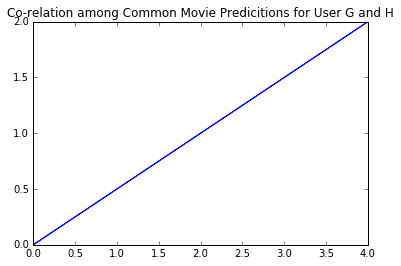

In [11]:
"""
IF YOU WANT TO RUN THIS CELL AGAIN,RE-RUN  EVERYTHING FROM BEGINING TO THIS CELL-the ourdict dictionary gets changed 
later on in the Movielens section with Sparse Values.
"""
print "Movies rated by User-G:\n",ourdict['UG']
print "Movies rated by User-H:\n",ourdict['UH']
ES=similiarity_users('UG','UH')
PCS=pearson_correlation('UG','UH')
print "\nEuclidean Similarity in Ratings Between them(Only Common Movies Considered):\n",ES
print "\nPearson Co-relation Similarity in Ratings Between them(Only Common Movies Considered):\n",PCS
UG_graph=[]
UH_graph=[]
for movie in ourdict['UG']:
    if movie in ourdict['UH']:
       UG_graph.append(ourdict['UG'][movie])
       UH_graph.append(ourdict['UH'][movie])
plt.plot(UG_graph,UH_graph)#Plotting the Graph Between Similarity of User G and H
plt.title('Co-relation among Common Movie Predicitions for User G and H')
plt.show()



Here,we see the Pearson Correlation giving us our expected value whereas the Euclidean Measurement fails.
We hence,go in with the Former for computing our User-Item based Similarity in the next section.

<a id='FCN'></a>
## FINDING CLOSEST NEIGHBOURS TO A PERSON
We now go in for our implementation of User-Item Similiarity based on our previous approach .
* Take Users from Our List who have Rated Certain Items.
* Calculate the Distance between People  based on their Rating.
* Find the Individuals who are similar to the given person.


In [12]:
"""
The Function takes 2 inputs:-
Person:-Individual for Whom the Closest Neighours have to be computed
n:-Number of Closest Neigbours to Return
"""
def similar_users(person,n):
    sim_scores={}
    for individual in ourdict:
        if(individual!=person):#Compute Pearson Correlation Value for Every Other User in the List
            sim_scores[individual]=pearson_correlation(person,individual)       
    sort_sim=sorted(sim_scores) #Sort the Dicitonary  Key by Pearson Value(Ascending Order)
    sort_sim_values=sorted(sim_scores.values())# Sort the Value by Pearson Value(Ascending Order)
    sort_sim=sort_sim[len(sort_sim)-n:]#Get the Last n elements->Closest n Matches
    sort_sim_values=sort_sim_values[len(sim_scores)-n:]
    sort_sim=sort_sim[::-1]#Reverse the List
    sort_sim_values=sort_sim_values[::-1]
    return sort_sim,sort_sim_values
    pass

In [13]:
Closest_neighbours,value=similar_users('UA',5)#Returns 5 CLosest Neghbours to User A
print "The Closest Neighbours to User A are(gave similar ratings to movies):\n",Closest_neighbours
print "The Pearson Similarity Scores are:\n",value



The Closest Neighbours to User A are(gave similar ratings to movies):
['UL', 'UK', 'UJ', 'UI', 'UH']
The Pearson Similarity Scores are:
[0.4472135954999579, 0.24019223070763124, 0.21821789023599134, 0.10629880069054613, 0.08137884587711594]


<a id='RBI'></a>
## RECOMMENDING BEST ITEM TO A USER

Now,let us proceed with our Implementation of Recommending Products to a Given User.The Steps are:-
* Finding the Pearson Similarity with Every Other User in the Database.
* For all these Other Users,getting the Rating for a Particular Movie(not seen by the First User) and computing the sum of product of the Pearson Similarity and the Rating.
* Dividing the Weighted Sum of these Ratings by the Sum of the Similarity Scores to obtain the recommendation for a     Given Product on a Rating Scale of 0-5.
* We can choose on how many Product Recommendations to return to the User.If n=1 is fed in as an Input then,the given   function only returns the HIghest rated product.
  Note:In our Implementation,we only consider the Cases of Products with Positive Pearson Correlation Values.

In [14]:
"""
This Function takes in 2 inputs:-
user:-Individual for Whom Movies have to be recommended to be seen
n-Number of Movies to be recommended
"""
def get_best_items(user,n):
    movie_count={}
    rating_sum={}
    for individual in ourdict:
        if(individual!=user):
            sim_scores=pearson_correlation(user,individual) #Getting Pearson Correlation for all other movies
        for movie  in ourdict[individual]:
            if(movie not in ourdict[user]):
              if(ourdict[individual][movie]!=0):
                if(sim_scores>=0):#Get Similiart Scores for When Positive Co-rrelation
                    rating_sum.setdefault(movie,0)#Initialize the Dictionary Key to be Zero if no value present
                    movie_count.setdefault(movie,0)
                    #Get Product of Movie Rating  by Neighbour and Similairt Score Value
                    rating_sum[movie]+=float(ourdict[individual][movie]*sim_scores)
                    
                    movie_count[movie]+=float(sim_scores)
                    
    
    #Sparse Condition for Movie Lens Data Set
    for movie in movie_count:
        if movie_count[movie]==0:
            movie_count[movie]+=1
    #print rating_sum
    #print movie_count
    for movie in rating_sum:
        #Divide the Sum of all Movie  Ratings by the Similiarty Score
        rating_sum[movie]=float(float(rating_sum[movie])/float(movie_count[movie]))
    rating_sum_movie=sorted(rating_sum,key=rating_sum.__getitem__) 
    #Sort the Dictionary according to Key Values
   
    rating_sum_value=sorted(rating_sum.values()) 
    #^^SPECIAL CASE:when more ratings are requested than dictionary elements present,return entire dictionary
    #Else break into N top entries to be returned
    if(len(rating_sum_value)>n):
     rating_sum_movie=rating_sum_movie[len(rating_sum_movie)-n:]#Get Last n Eleements
     rating_sum_value=rating_sum_value[len(rating_sum_value)-n:]
     rating_sum_movie=rating_sum_movie[::-1]#Reverse the List
     rating_sum_value=rating_sum_value[::-1]
     return rating_sum_movie,rating_sum_value   
    if(len(rating_sum_value)==0):
        return 0,0
    return rating_sum_movie[::-1],rating_sum_value[::-1]
    
        
                
                
        
    

In [15]:
rating_sum_movie,rating_sum_value=get_best_items('UH',4)
#The Number of entries returned may be less than n-For example setting it to 5 will only produce 4 close Move Predictions
#This is because it does not have enough close neighoburs with Positive Pearson Co-rrelation score.
print "Best Recommended Movies are",rating_sum_movie
print "Ratings for these Movies are",rating_sum_value

Best Recommended Movies are ['IJ', 'ID', 'IF', 'IG']
Ratings for these Movies are [4.0, 3.6336239799555576, 3.1860852410832603, 2.6244754032150293]


<a id='MLDS'></a>
# MOVIE LENS DATA SET

Here,we make use of a Real world Data set provided in the Movie Lens website-100K Dataset.It consists of **100,000 ratings** from **1000 Users** on **1700 Movies**.We proceed with Loading the Data Files and Visualizing Certain Features of our Data set.

In [16]:
#REFERENCE:MOVIELENS.COM 100K MOVIES/GREGRADA.COM BLOG
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']#Given the Column Names for User  and Movie Rating Data
ratings = pd.read_csv('u.data', sep='\t', names=r_cols,encoding='latin-1')#Extract User Data File
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']#Give Column Names for Movies
movies = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(5),  encoding='latin-1')
title_merged=pd.merge(movies,ratings)#Merge the 2 Data Frames
del title_merged['video_release_date'] #Drop the Column not required.
print title_merged.head()#Show the top 5 elements of the Merged Dataframe.

   movie_id             title release_date  \
0         1  Toy Story (1995)  01-Jan-1995   
1         1  Toy Story (1995)  01-Jan-1995   
2         1  Toy Story (1995)  01-Jan-1995   
3         1  Toy Story (1995)  01-Jan-1995   
4         1  Toy Story (1995)  01-Jan-1995   

                                            imdb_url  user_id  rating  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...      308       4   
1  http://us.imdb.com/M/title-exact?Toy%20Story%2...      287       5   
2  http://us.imdb.com/M/title-exact?Toy%20Story%2...      148       4   
3  http://us.imdb.com/M/title-exact?Toy%20Story%2...      280       4   
4  http://us.imdb.com/M/title-exact?Toy%20Story%2...       66       3   

   timestamp  
0  887736532  
1  875334088  
2  877019411  
3  891700426  
4  883601324  


<a id='FAWD'></a>
## MERGING USER DATA AND VISUALIZATION 

In [17]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']#Column Name for User Personal Data
users = pd.read_csv('u.user', sep='|', names=u_cols,  encoding='latin-1')
all_merged=pd.merge(title_merged,users)#Merge this to our existing Dataframe
print all_merged.head()

   movie_id                  title release_date  \
0         1       Toy Story (1995)  01-Jan-1995   
1         4      Get Shorty (1995)  01-Jan-1995   
2         5         Copycat (1995)  01-Jan-1995   
3         7  Twelve Monkeys (1995)  01-Jan-1995   
4         8            Babe (1995)  01-Jan-1995   

                                            imdb_url  user_id  rating  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...      308       4   
1  http://us.imdb.com/M/title-exact?Get%20Shorty%...      308       5   
2  http://us.imdb.com/M/title-exact?Copycat%20(1995)      308       4   
3  http://us.imdb.com/M/title-exact?Twelve%20Monk...      308       4   
4     http://us.imdb.com/M/title-exact?Babe%20(1995)      308       5   

   timestamp  age sex occupation zip_code  
0  887736532   60   M    retired    95076  
1  887737890   60   M    retired    95076  
2  887739608   60   M    retired    95076  
3  887738847   60   M    retired    95076  
4  887736696   60   M    retired  

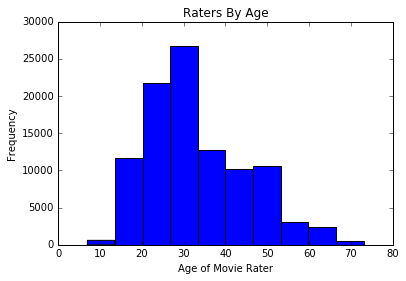

In [18]:
#Get the Average Age of All Users and convert it to a List
"""
Note Certain Users may get repeated since,we are trying to Visualize  sum total ofAge->Movie Rater Histogram and
not Unique User
Age"""
user_age=all_merged['age'].tolist()   
plt.hist(user_age[:len(user_age)])#HISTOGRAM PLOT OF RATERS BY AGE
plt.title("Raters By Age")
plt.xlabel("Age of Movie Rater")
plt.ylabel("Frequency")
plt.show()

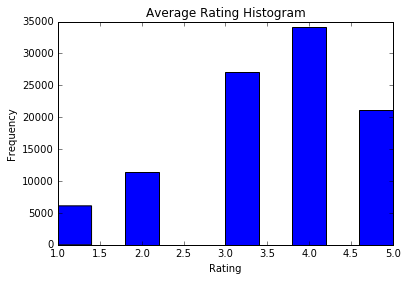

In [19]:
user_rating=all_merged['rating'].tolist()   
plt.hist(user_rating[:len(user_rating)])
plt.title("Average Rating Histogram")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

 <a id='GTRM'></a>
## GET TOP RATED MOVIES FOR USERS

In [20]:
"""
Here we proceed to find the Top Rated Movies for a User,based on the Same Pearson Similiarity Formula that we were Using 
before.The Initial Step involves building up our Dictionary similar to what we did with the Sample Data in the previous
section
"""
i=0
ourdict={}
for user in title_merged['user_id']:
    if(user in ourdict):
        ourdict[user][title_merged['title'][i]]=title_merged['rating'][i]
        #Append New USer->Movie_>Rating Value to the Dicitonary
    else:
        ourdict[user]={}
        ourdict[user][title_merged['title'][i]]=title_merged['rating'][i]
    i+=1


In [21]:
"""
We can now  proceed to find the Top recommended movies for a Given User in the Data set.Since our Data set
is much bigger than before we set n=20.We find the Top rated Movies for 2 Users,'1' and '200'

"""

rating_sum_movie,rating_sum_value=get_best_items(1,20)
print "\nThe Top Rated Movies for User 1 are:\n" ,rating_sum_movie
print "The Ratings Given by them by Closest Neighbours are:\n",rating_sum_value


rating_sum_movie,rating_sum_value=get_best_items(200,20)
print "\n\nThe Top Rated Movies for User 200 are:\n" ,rating_sum_movie
print "The Ratings Givng by them by Closest Neighbours are:\n",rating_sum_value


The Top Rated Movies for User 1 are:
[u'Marlene Dietrich: Shadow and Light (1996) ', u'Star Kid (1997)', u'Saint of Fort Washington, The (1993)', u'Little City (1998)', u'They Made Me a Criminal (1939)', u'Great Day in Harlem, A (1994)', u'Aiqing wansui (1994)', u"Someone Else's America (1995)", u'Prefontaine (1997)', u'Santa with Muscles (1996)', u'Two or Three Things I Know About Her (1966)', u'Anna (1996)', u'Pather Panchali (1955)', u'Close Shave, A (1995)', u"Some Mother's Son (1996)", u'Casablanca (1942)', u'Aparajito (1956)', u'Everest (1998)', u"Schindler's List (1993)", u'Leading Man, The (1996)']
The Ratings Given by them by Closest Neighbours are:
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.999999999999999, 4.750026164428947, 4.67419845295723, 4.62621252127888, 4.5297638181925235, 4.5196020288745755, 4.495066759181234, 4.475594945822551, 4.472267854467307, 4.467066096824052, 4.4485287106635]


The Top Rated Movies for User 200 are:
[u'Prefontaine (1997)', u'Saint of For

Lets have a Look at the Top Most Viewed Movies and try to go a bit deeper into the statistics behind it.

In [22]:
#Find the Top-5 Most rated Movies.
print "MOST RATED MOVIES:\n",all_merged.groupby('title').size().sort_values(ascending=False)[:5]

MOST RATED MOVIES:
title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
dtype: int64


So we see Star Wars is the most rated Movie according to the Database.We proceed with Finding Trends with Star Wars(A Personal Favorite Movie as well).

In [23]:
"""
Finding some Trends relating to Star Wars Similiar to What we did before.We extract the Age,Rating and Gender of
Every Individual who rated this movie.
"""
i=0
age=[]
rating=[]
sex=[]
occupation=[]
for movie in all_merged['title']:
    if(movie=='Star Wars (1977)'):
        age.append(all_merged['age'][i])
        rating.append(all_merged['rating'][i])
        sex.append(all_merged['sex'][i])
        occupation.append(all_merged['occupation'][i])
    i+=1



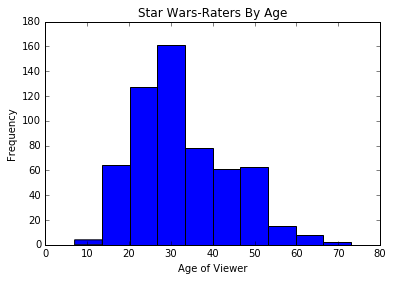

In [24]:
plt.hist(age)#Histogram of Age
plt.title("Star Wars-Raters By Age")
plt.xlabel("Age of Viewer")
plt.ylabel("Frequency")
plt.show()

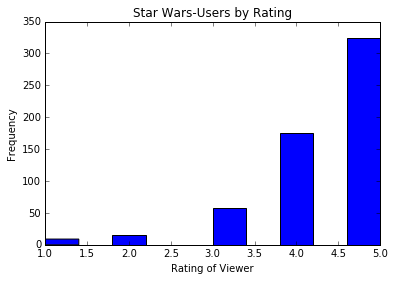

In [25]:
plt.hist(rating)#Histogram of Average Rating
plt.title("Star Wars-Users by Rating")
plt.xlabel("Rating of Viewer")
plt.ylabel("Frequency")
plt.show()

Here,from the Histograms plotted above we notice,trends noticed are:-
* Average Rating is higher for Star Movies,than the Average Rating over all Movies .Also,the distribution is no longer Gaussian ,but follows the Power Law Curve.
* An almost identical Gaussian Distribution centred around the 30 years Age mark is obtained for both 'Star Wars' histogram and the Histogram of all the Movies.

<a id='EVRS'></a>
# EVALUATING RECOMMENDER SYSTEMS AND CHALLENGES

There are many methods by which recommender systems,can be evaluated.Some of these are:-

* Forms of A/B Testing to see How users respond to Clicks on Recommender Systems.By evaluating the response of users towards different versions of the recommendation engine,can select the most optimal one.
* The traditional Training/Hold-Out Set approach where a part of Training Data is kept aside and our Algorithm is run on this unseen data to evaluate how well the recommendation system is actually doing.The Root Mean Square Error Metric can be used in this scenario.Normalized RMSE and Mean Absolute Error are also metrics to be used.Precision and Recall Scores can also be used.
* Most of the Entries in our Data are sparse->Users have rated only a small percentage of each item.The time taken to compute the predictions and memory required(Using Sparse Matrices Instead?)are also valid metrics.It doesnt make much sense to use a System which gives relatively more accurate predictions but takes up a lot of Time and space to get working.


Recommendation systems,though very useful today suffer from numerous drawbacks.One of the challenges is called the "Cold Start Problem" is what to do when the Data is very limited.It is akin to a "Catch-22" situation where users wont make use of the system until it is functioning ,and the system wont function properly until users make use of it.A solution to this intiial problem,is to start of with "Content Based Filtering"-by recommending previous movies that are commonly seen along with the one being rated.After a while the Collaborative Filtering system can be integrated.

<a id='RHL'></a>
# REFERENCES AND HELPFUL LINKS

For further information on Collabroative Filtering the following Links might be Useful:-
* [University ofAberdeenPresentation](http://homepages.abdn.ac.uk/advaith/pages/teaching/abdn.only/AIS/lectures/abdn.only/CollaborativeFiltering.pdf)
* [Item Based Collaborative FIltering Algorithm-Research Paper](http://www10.org/cdrom/papers/519/)
* [A Survey of Collaborative Filtering Techniqes](https://www.hindawi.com/journals/aai/2009/421425/)
* [University of Minessota-Introduction to Recommender Systems](https://www-users.cs.umn.edu/~konstan/SIGMOD-2008-Tut.pdf)
* [MovieLens Data Set](http://grouplens.org/datasets/movielens/)
* [Winning the Netflix Prize:A Summary](http://blog.echen.me/2011/10/24/winning-the-netflix-prize-a-summary/)

